# Exploratory Data Analysis

## 1 - Introduction

#### **Project Name**


#### **Description**


#### **Team**
+ Kevin Tomas
+ Sebastian Rötten
+ Chandrakantha Hassan Anantharajaiah
+ Michael Leder

#### **Time Period**
+ **Start:** 23/11/2020
+ **End:** 18/12/2020

#### **Table of Content**

[…]

## **2 - Environments and Imports**

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set_palette('Blues_r')

# Define decimal places shown in the notebook
pd.options.display.float_format = '{:,.1f}'.format

## **3 - Business Understanding**
### **3.1 - Data Set**

In [2]:
df = pd.read_csv('00_data/f_chtr_churn_traintable_nf.csv', index_col=0)

In [3]:
df.shape

(209043, 170)

In [4]:
df.columns

Index(['auftrag_new_id', 'liefer_beginn_evt', 'kanal', 'objekt_name',
       'aboform_name', 'zahlung_rhythmus_name', 'lesedauer', 'rechnungsmonat',
       'zahlung_weg_name', 'studentenabo',
       ...
       'openrate_zeitbrief_1w', 'clickrate_zeitbrief_1w',
       'openrate_zeitbrief_1m', 'clickrate_zeitbrief_1m',
       'openrate_zeitbrief_3m', 'clickrate_zeitbrief_3m', 'training_set',
       'kuendigungs_eingangs_datum', 'churn', 'date_x'],
      dtype='object', length=170)

In [5]:
# Rename inconsistent column names
df.rename({'openedanzahl_6m':'opened_anzahl_6m'}, axis=1, inplace=True)

## **X - Data Split**
Each of the team members investigates a subset of the initial data frame. Therefore, a subset of the data frame has to be selected by dropping the not relevant columns.

In [9]:
# List comprehension for columns to be dropped
cols1 = [i for i in range(22, 56)] # Slice 1
cols2 = [i for i in range(100, 166)] # Slice 2

# Convert to list type
cols1 = list(df.columns[cols1])
cols2 = list(df.columns[cols2])

#print(cols1)
#print('---------------')
#print(cols2)

In [10]:
df_c = df.drop(columns=cols1, axis=1)
df_c = df_c.drop(columns=cols2, axis=1)

In [12]:
df_c.columns

Index(['auftrag_new_id', 'liefer_beginn_evt', 'kanal', 'objekt_name',
       'aboform_name', 'zahlung_rhythmus_name', 'lesedauer', 'rechnungsmonat',
       'zahlung_weg_name', 'studentenabo', 'plz_1', 'plz_2', 'plz_3', 'ort',
       'metropole', 'land_iso_code', 'shop_kauf', 'unterbrechung', 'anrede',
       'titel', 'avg_churn', 'email_am_kunden', 'received_anzahl_1w',
       'received_anzahl_1m', 'received_anzahl_3m', 'received_anzahl_6m',
       'opened_anzahl_1w', 'opened_anzahl_1m', 'opened_anzahl_3m',
       'opened_anzahl_6m', 'clicked_anzahl_1w', 'clicked_anzahl_1m',
       'clicked_anzahl_3m', 'clicked_anzahl_6m', 'unsubscribed_anzahl_1w',
       'unsubscribed_anzahl_1m', 'unsubscribed_anzahl_3m',
       'unsubscribed_anzahl_6m', 'openrate_1w', 'clickrate_1w', 'openrate_1m',
       'clickrate_1m', 'openrate_3m', 'clickrate_3m',
       'received_anzahl_bestandskunden_1w',
       'received_anzahl_bestandskunden_1m',
       'received_anzahl_bestandskunden_3m',
       'received_an

## **Y - Data Exploration (get an overview)**

In [13]:
df_c.head(1)

,auftrag_new_id,liefer_beginn_evt,kanal,objekt_name,aboform_name,zahlung_rhythmus_name,lesedauer,rechnungsmonat,zahlung_weg_name,studentenabo,...,openrate_bestandskunden_1w,clickrate_bestandskunden_1w,openrate_bestandskunden_1m,clickrate_bestandskunden_1m,openrate_bestandskunden_3m,clickrate_bestandskunden_3m,training_set,kuendigungs_eingangs_datum,churn,date_x
0,6BE5B590-07EA-4543-B422-F7ABB2AF9464,2013-10-02,andere,ZEIT Digital,Probeabo,jährlich,68,0,Bankeinzug,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1,NaN,0,2019-06-18 00:00:00


### **Descriptive Statistics**

In [14]:
df_c.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
lesedauer,"209,043.0",32.0,21.6,0.0,14.0,27.0,47.0,88.0
rechnungsmonat,"209,043.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0
studentenabo,"209,043.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0
metropole,"209,043.0",0.3,0.5,0.0,0.0,0.0,1.0,1.0
shop_kauf,"209,043.0",0.5,2.5,0.0,0.0,0.0,0.0,152.0
unterbrechung,"209,043.0",0.1,0.3,0.0,0.0,0.0,0.0,1.0
avg_churn,"209,043.0",0.3,0.1,0.1,0.2,0.3,0.4,0.7
email_am_kunden,"209,031.0",0.9,0.2,0.0,1.0,1.0,1.0,1.0
received_anzahl_1w,"209,043.0",3.3,4.4,0.0,0.0,2.0,5.0,54.0
received_anzahl_1m,"209,043.0",12.8,16.5,0.0,1.0,7.0,19.0,203.0


### **Data types**

In [15]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209043 entries, 0 to 209042
Data columns (total 70 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   auftrag_new_id                         209043 non-null  object 
 1   liefer_beginn_evt                      209043 non-null  object 
 2   kanal                                  209043 non-null  object 
 3   objekt_name                            209043 non-null  object 
 4   aboform_name                           209043 non-null  object 
 5   zahlung_rhythmus_name                  209043 non-null  object 
 6   lesedauer                              209043 non-null  int64  
 7   rechnungsmonat                         209043 non-null  int64  
 8   zahlung_weg_name                       209043 non-null  object 
 9   studentenabo                           209043 non-null  int64  
 10  plz_1                                  209043 non-null  

## **Check for NaN's**

In [16]:
df_c.isnull().sum().sort_values(ascending=False)[:5]

kuendigungs_eingangs_datum    142754
ort                               85
email_am_kunden                   12
date_x                             0
received_anzahl_3m                 0
dtype: int64

The subset of the initial data frame contains missing values in the columns ```ort``` (85), ```email_am_kunden``` (12) and ```kuendigungs_eingangs_datum``` (142,754) <br/>

So there are **142,851 NaN's existing** in the subset.
<br/>
**Arising Tasks:**
+ NaN's with suitable values
+ Therefore, check the value range of the columns

In [17]:
o = df_c['ort'].sort_values(ascending=True).unique()
e = df_c['email_am_kunden'].sort_values(ascending=True).unique()
k = df_c['kuendigungs_eingangs_datum'].sort_values(ascending=True).unique()

print(o)
print(e)
print(k)

["'s-Hertogenbosch" '.Floridablanca' '2300' ... 'Üttfeld' 'Üxheim' nan]
[ 0.  1. nan]
['2019-05-28' '2019-05-29' '2019-05-30' '2019-05-31' '2019-06-01'
 '2019-06-02' '2019-06-03' '2019-06-04' '2019-06-05' '2019-06-06'
 '2019-06-07' '2019-06-08' '2019-06-09' '2019-06-10' '2019-06-11'
 '2019-06-12' '2019-06-13' '2019-06-14' '2019-06-15' '2019-06-17'
 '2019-06-18' '2019-06-19' '2019-06-20' '2019-06-21' '2019-06-22'
 '2019-06-23' '2019-06-24' '2019-06-25' '2019-06-26' '2019-06-27'
 '2019-06-28' '2019-06-29' '2019-06-30' '2019-07-01' '2019-07-02'
 '2019-07-03' '2019-07-04' '2019-07-05' '2019-07-06' '2019-07-07'
 '2019-07-08' '2019-07-09' '2019-07-10' '2019-07-11' '2019-07-12'
 '2019-07-13' '2019-07-14' '2019-07-15' '2019-07-16' '2019-07-17'
 '2019-07-18' '2019-07-19' '2019-07-20' '2019-07-21' '2019-07-22'
 '2019-07-23' '2019-07-24' '2019-07-25' '2019-07-26' '2019-07-27'
 '2019-07-29' '2019-07-30' '2019-07-31' '2019-08-01' '2019-08-02'
 '2019-08-03' '2019-08-05' '2019-08-06' '2019-08-07' '20

## **Check for duplicates**

In [20]:
duplicates = df_c['auftrag_new_id'].duplicated().any()
duplicates

False

Based on the column 'auftrag_new_id' **no duplicates** could be found.

## **Further data splitting**

For the upcoming investigations the data is split into smaller, thematic chunks.

In [24]:
# Identify Index
#print(df_c.columns.get_loc('received_anzahl_bestandskunden_1w'))
#print(df_c.columns.get_loc('clickrate_bestandskunden_3m'))

In [25]:
# Created Subsets
df_dem = df_c.drop(df_c.iloc[:, 22:65], axis=1) # Subset containing the demographical in the data set --> dem = general
df_tot = df_c.iloc[:, 22:44]                    # Subset containing 'Erhalten insg ...' (engl. totally received) --> tot = total
df_e_cust = df_c.iloc[:, 44:66]                   # Subset containing 'Erhalten aus dem Bestandskundenmandanten ...' (engl. Received from existing customer) --> e_cust = existing customer

In [26]:
# Crosscheck of the subsets
print(df_dem.columns)
print(df_tot.columns)
print(df_e_cust.columns)

Index(['auftrag_new_id', 'liefer_beginn_evt', 'kanal', 'objekt_name',
       'aboform_name', 'zahlung_rhythmus_name', 'lesedauer', 'rechnungsmonat',
       'zahlung_weg_name', 'studentenabo', 'plz_1', 'plz_2', 'plz_3', 'ort',
       'metropole', 'land_iso_code', 'shop_kauf', 'unterbrechung', 'anrede',
       'titel', 'avg_churn', 'email_am_kunden', 'clickrate_bestandskunden_3m',
       'training_set', 'kuendigungs_eingangs_datum', 'churn', 'date_x'],
      dtype='object')
Index(['received_anzahl_1w', 'received_anzahl_1m', 'received_anzahl_3m',
       'received_anzahl_6m', 'opened_anzahl_1w', 'opened_anzahl_1m',
       'opened_anzahl_3m', 'opened_anzahl_6m', 'clicked_anzahl_1w',
       'clicked_anzahl_1m', 'clicked_anzahl_3m', 'clicked_anzahl_6m',
       'unsubscribed_anzahl_1w', 'unsubscribed_anzahl_1m',
       'unsubscribed_anzahl_3m', 'unsubscribed_anzahl_6m', 'openrate_1w',
       'clickrate_1w', 'openrate_1m', 'clickrate_1m', 'openrate_3m',
       'clickrate_3m'],
      dtype='obje

## **Value based insights**

In [27]:
# Display the whole content of the data frame
pd.set_option('display.max_columns', None)   # Displays all columns
pd.set_option('display.max_rows', None)      # Displays all rows

In [28]:
# Print unique values by column
#def print_uniques(cols):
#    content = list([df_dem[i].sort_values().unique() for i in cols])
#    print(*content, sep='\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n')
    
#print_uniques(df_dem.columns)

## **Visual insights**

#### **Hypothesis**
1. People with a academic title build the majority of the subscribers
2. ...

### **df_dem - Demographical data**
#### **'kanal'**

Text(0.5, 0, ' ')

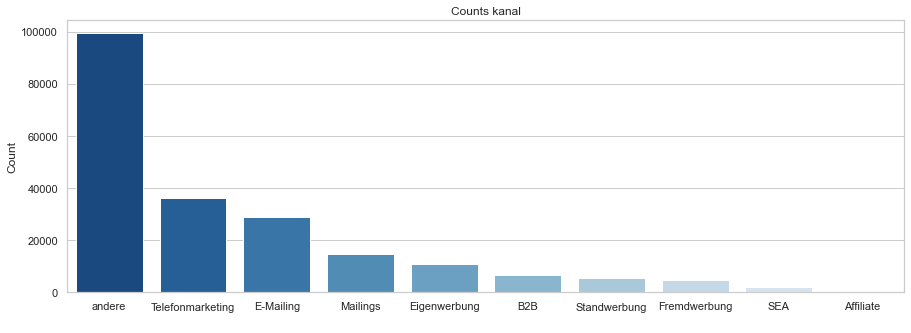

In [29]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='kanal', data=df_dem, palette='Blues_r', order = df_dem['kanal'].value_counts().index);
plt.title('Counts kanal')
plt.ylabel('Count')
plt.xlabel(' ')

In [30]:
df_dem.kanal.value_counts()

andere              99299
Telefonmarketing    36029
E-Mailing           28796
Mailings            14791
Eigenwerbung        10736
B2B                  6525
Standwerbung         5593
Fremdwerbung         4677
SEA                  1993
Affiliate             604
Name: kanal, dtype: int64

The column 'kanal' (engl. channel) contains information about how customers are reached out to for acquisition.

**Description:**
+ The most important channel to reach out to subscribers is others
+ Traditional channels like phone marketing, e-mail etc. are less common

#### **'objekt_name'**

Text(0.5, 0, ' ')

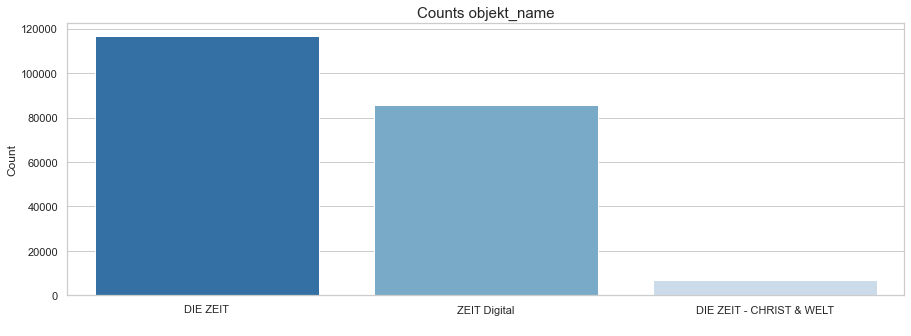

In [31]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='objekt_name', data=df_dem, palette='Blues_r', order = df_dem['objekt_name'].value_counts().index);
plt.title('Counts objekt_name', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

In [32]:
df_dem.objekt_name.value_counts()

DIE ZEIT                    116516
ZEIT Digital                 85548
DIE ZEIT - CHRIST & WELT      6979
Name: objekt_name, dtype: int64

The column 'objekt_name' (engl. object name) contains information about what has been subscribed.

**Description:**
+ About 120,000 subscriptions of 'DIE ZEIT' (traditional print media)
+ About 80,000 subscriptions of 'ZEIT Digital' (digital media)

#### **'aboform_name'**

Text(0.5, 0, ' ')

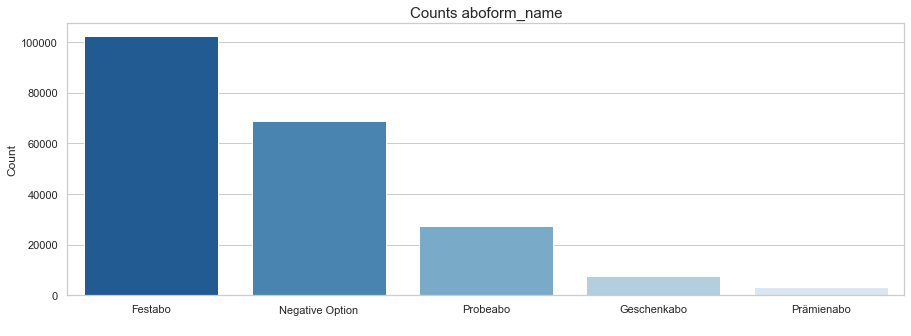

In [33]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='aboform_name', data=df_dem, palette='Blues_r', order = df_dem['aboform_name'].value_counts().index);
plt.title('Counts aboform_name', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

**Note:** ```Negativ Option``` --> ```Probeabo``` converted into a ```Festabo```

In [34]:
df_dem.aboform_name.value_counts()

Festabo            102203
Negative Option     68687
Probeabo            27155
Geschenkabo          7716
Prämienabo           3282
Name: aboform_name, dtype: int64

The column 'aboform_name' (engl. subscription name) contains information about subscription types.

**Description:**
+ About 100,000 with a subscription ('Festabo')
+ About 65,000 subscribers with a negative option ('Negative Option')

#### **'zahlung_rhythmus_name'**

Text(0.5, 0, ' ')

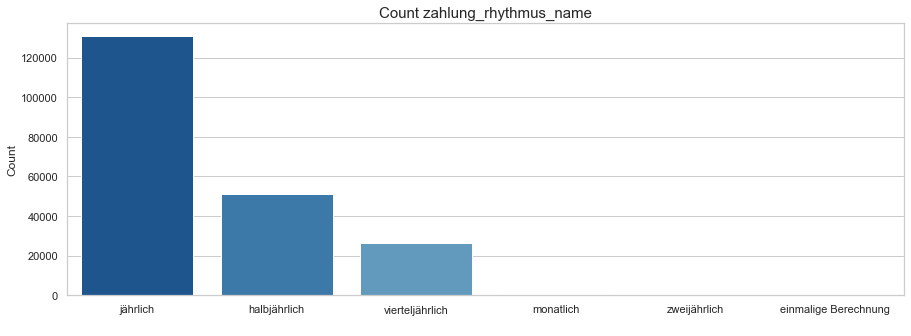

In [35]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='zahlung_rhythmus_name', data=df_dem, palette='Blues_r', order = df_dem['zahlung_rhythmus_name'].value_counts().index);
plt.title('Count zahlung_rhythmus_name', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

In [36]:
df_dem.zahlung_rhythmus_name.value_counts()

jährlich                130711
halbjährlich             50933
vierteljährlich          26631
monatlich                  647
zweijährlich               101
einmalige Berechnung        20
Name: zahlung_rhythmus_name, dtype: int64

The column 'zahlung_rhythmus_name' (engl. payment rhythm) contains information about payment rhythm of subscribers.

**Description:**
+ The most common subscription type is a annually subscription
+ The annually subscription is followed by the semi-annually subscription
+ No monthly, two-yearly or unique subscriptions can be found in the data set

#### **'lesedauer'**

Text(0.5, 8.95999999999998, ' ')

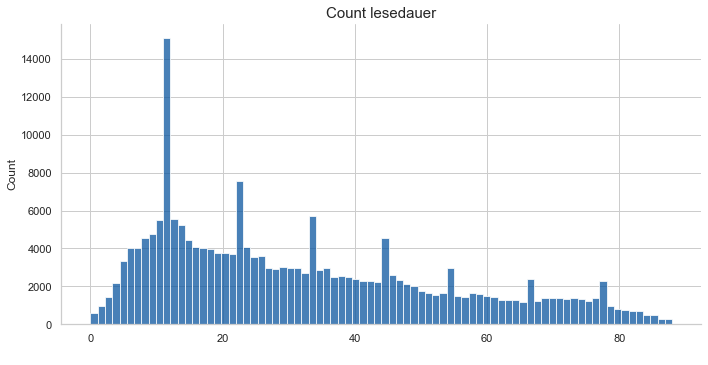

In [37]:
sns.displot(x='lesedauer', data=df_dem, palette='Blues_r', height=5, aspect=2);
plt.title('Count lesedauer', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

The column 'lesedauer' (engl. reading duration) contains information about duration of reading from the incoming of an order to the termination of an order.

**Description:**
+ Distribution is skewed to the right

In [38]:
df_dem.lesedauer.sort_values().value_counts().index.sort

<bound method Index.sort of Int64Index([11, 12, 13, 10, 14,  9,  8, 15, 16, 24,  7, 17,  6, 23, 18, 20, 19,
            21, 26, 22, 25,  5, 29, 27, 31, 36, 30, 28, 33, 35, 34, 32, 46, 38,
            37, 39, 40, 47, 45, 42, 41, 43, 44,  4, 48, 49, 50, 51, 58, 53, 59,
            52, 60, 54, 56, 57, 55, 61,  3, 73, 76, 70, 71, 69, 72, 74, 64, 63,
            62, 67, 68, 75, 77, 66, 65, 78,  2, 79, 80, 81, 82, 83,  1, 85, 84,
            86, 87, 88,  0],
           dtype='int64')>

#### **'rechnungsmonat'**

Text(0.5, 8.95999999999998, ' ')

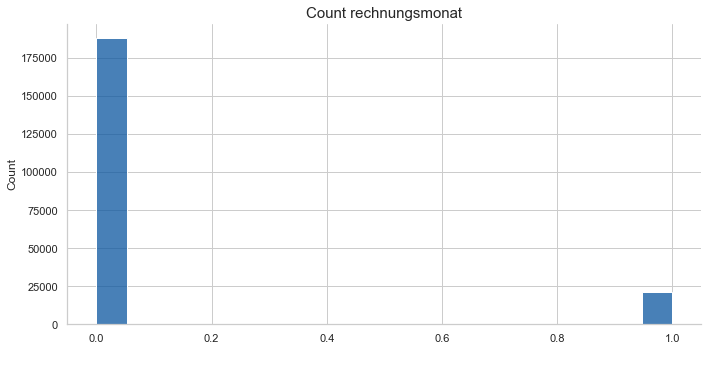

In [39]:
sns.displot(x='rechnungsmonat', data=df_dem, palette='Blues_r', height=5, aspect=2);
plt.title('Count rechnungsmonat', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

In [40]:
df_dem.rechnungsmonat.sort_values().value_counts()

0    187973
1     21070
Name: rechnungsmonat, dtype: int64

[…]

**Description:**
+ [...]

#### **'zahlung_weg_name'**

Text(0.5, 0, ' ')

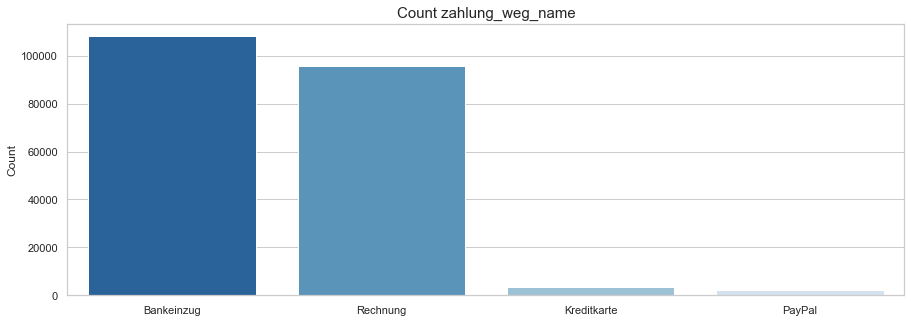

In [41]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='zahlung_weg_name', data=df_dem, palette='Blues_r', order = df_dem['zahlung_weg_name'].value_counts().index);
plt.title('Count zahlung_weg_name', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

In [43]:
df_dem.zahlung_weg_name.sort_values().value_counts()

Bankeinzug     108076
Rechnung        95543
Kreditkarte      3266
PayPal           2158
Name: zahlung_weg_name, dtype: int64

The column 'zahlung_weg_name' (engl. payment method) contains information about payment method customers used.

**Description:**
+ The most common payment Method

**Conclusion:**
Together with the TOP1 payment method this rather conservative method of paying might lead back to a rather old readership.

**Emerging Task:**
+ Investigate demographics deeper
+ ...

#### **'studentenabo'**

Text(0.5, 0, ' ')

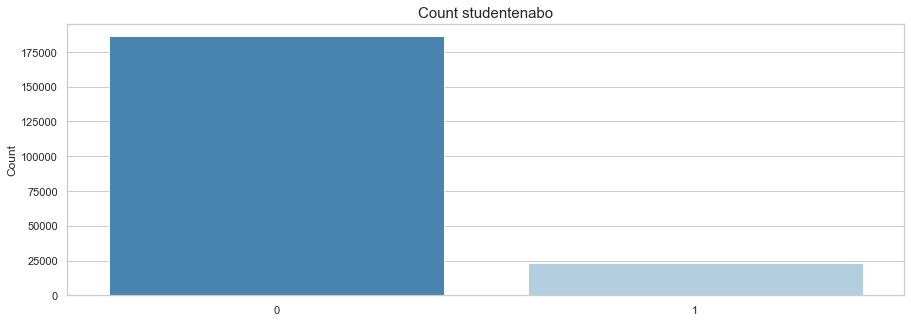

In [45]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.countplot(x='studentenabo', data=df_dem, palette='Blues_r', order = df_dem['studentenabo'].value_counts().index);
plt.title('Count studentenabo', fontsize=(15))
plt.ylabel('Count')
plt.xlabel(' ')

#### **'land_iso_code'**

[...TBC…]

### **df_tot - Totally received**

In [46]:
df_tot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209043 entries, 0 to 209042
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   received_anzahl_1w      209043 non-null  int64  
 1   received_anzahl_1m      209043 non-null  int64  
 2   received_anzahl_3m      209043 non-null  int64  
 3   received_anzahl_6m      209043 non-null  int64  
 4   opened_anzahl_1w        209043 non-null  int64  
 5   opened_anzahl_1m        209043 non-null  int64  
 6   opened_anzahl_3m        209043 non-null  int64  
 7   opened_anzahl_6m        209043 non-null  int64  
 8   clicked_anzahl_1w       209043 non-null  int64  
 9   clicked_anzahl_1m       209043 non-null  int64  
 10  clicked_anzahl_3m       209043 non-null  int64  
 11  clicked_anzahl_6m       209043 non-null  int64  
 12  unsubscribed_anzahl_1w  209043 non-null  int64  
 13  unsubscribed_anzahl_1m  209043 non-null  int64  
 14  unsubscribed_anzahl_

In [48]:
# Print unique values by column
#def print_uniques(cols):
#    content = list([df_tot[i].sort_values().unique() for i in cols])
#    print(*content, sep='\n ++++++++++++++++++++++++++++++++++++++++++++++++++++++ \n')
    
#print_uniques(df_tot.columns)

In [ ]:
def add_count(plot):
    '''adds counts to bar and count plots'''
    for p in plot.patches:
        plot.annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')

In [ ]:
relevant = ["zon_zp_grey", "zon_premium", "zon_sonstige", "zon_zp_red"]
for i in relevant: 
    ax = sns.countplot(x=i, data=data, hue="churn") 
    ax.set(xlabel=i, ylabel="Frequency", xlim=[-0.5, 2.5]) 
    add_count(ax)
    plt.title(f"Distribution of {i} grouped by churn")
    plt.show()

### **df_e_cust - Totally received**
#### **''**

In [ ]:
df_e_cust.info()

In [ ]:
# Function to calculate missing values by column
# def missing_values_table(df):
#        # Total missing values
#        mis_val = df.isnull().sum()
#        # Percentage of missing values
#        mis_val_percent = 100 * mis_val / len(df)
#        # Make a table with the results
#        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
#        # Rename the columns
#        mis_val_table_ren_columns = mis_val_table.rename(
#        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
#        # Sort the table by percentage of missing descending
#        mis_val_table_ren_columns = mis_val_table_ren_columns[
#            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
#        '% of Total Values', ascending=False).round(3)
#        # Print some summary information
#        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
#            "There are " + str(mis_val_table_ren_columns.shape[0]) +
#              " columns that have missing values.")
#        # Return the dataframe with missing information
#        return mis_val_table_ren_columns


###################

#ax = sns.countplot(x="class", hue="who", data=titanic)